1. Simular dataset
Supongamos que tenemos las siguientes columnas de un dataset combinado de Yelp y Google Maps:

In [5]:
import pandas as pd
import numpy as np

# Crear dataset simulado
np.random.seed(42)

data = {
    'business_id': [f'biz_{i}' for i in range(1, 1001)],
    'name': [f'Business_{i}' for i in range(1, 1001)],
    'categories': np.random.choice(['Restaurant', 'Cafe', 'Bar', 'Gym', 'Salon'], 1000),
    'latitude': np.random.uniform(37.5, 37.9, 1000),
    'longitude': np.random.uniform(-122.5, -122.1, 1000),
    'review_count': np.random.randint(1, 500, 1000),
    'stars': np.random.uniform(1, 5, 1000),
    'average_sentiment': np.random.uniform(-1, 1, 1000),
    'competitors_nearby': np.random.randint(0, 20, 1000),
}

df = pd.DataFrame(data)

# Agregar éxito (éxito = 1 si tiene más de 4 estrellas y más de 200 reseñas)
df['success'] = ((df['stars'] > 4) & (df['review_count'] > 200)).astype(int)

print(df.head())


  business_id        name categories   latitude   longitude  review_count  \
0       biz_1  Business_1        Gym  37.872847 -122.213471           311   
1       biz_2  Business_2      Salon  37.726053 -122.471166           358   
2       biz_3  Business_3        Bar  37.778660 -122.471497           374   
3       biz_4  Business_4      Salon  37.869000 -122.495157           466   
4       biz_5  Business_5      Salon  37.782895 -122.117399           154   

      stars  average_sentiment  competitors_nearby  success  
0  1.181277          -0.609606                  15        0  
1  2.399780           0.356982                  13        0  
2  4.717154          -0.353801                  19        1  
3  2.516906           0.975499                  19        0  
4  4.325471          -0.348630                   5        0  


2. Preprocesamiento de datos
Limpieza, codificación de categorías, y división en conjunto de entrenamiento y prueba.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codificar categorías
df['categories_encoded'] = LabelEncoder().fit_transform(df['categories'])

# Seleccionar características relevantes y la etiqueta
features = ['latitude', 'longitude', 'review_count', 'stars', 'average_sentiment', 'competitors_nearby', 'categories_encoded']
X = df[features]
y = df['success']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


3. Entrenar un modelo
Usaremos Random Forest como modelo base para la clasificación del éxito.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar el modelo
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de confusión:
[[169   0]
 [  0  31]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        31

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Precisión del modelo:
1.0


4. Importancia de características
Identificar qué factores son más influyentes en el éxito de un negocio.

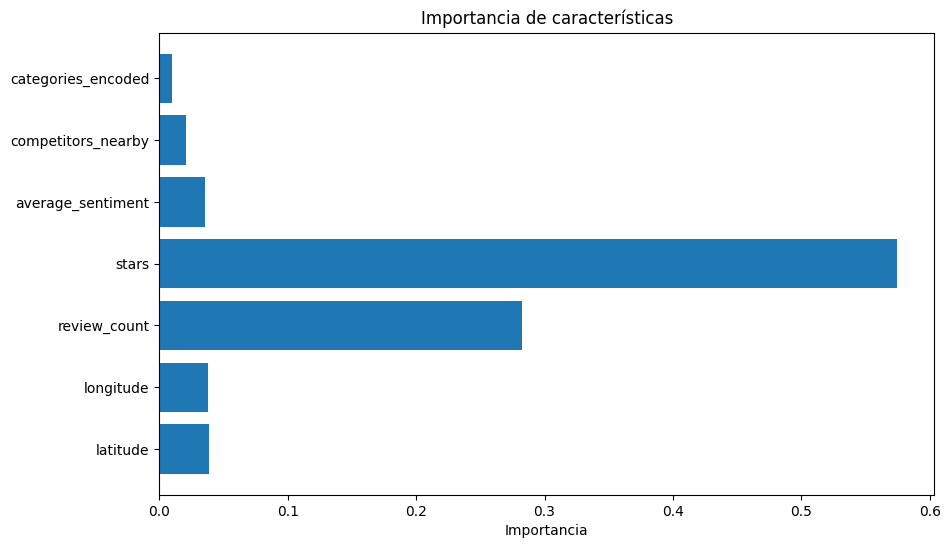

In [8]:
import matplotlib.pyplot as plt

# Importancia de las características
importances = model.feature_importances_
feature_names = features

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de características")
plt.show()

5. Visualización en un mapa
Visualizar los negocios exitosos y no exitosos en un mapa interactivo.

In [10]:
import folium

# Crear un mapa de los negocios
mapa = folium.Map(location=[37.7, -122.3], zoom_start=10)

for _, row in df.iterrows():
    color = 'green' if row['success'] == 1 else 'red'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['name']} - {row['categories']} ({row['stars']} stars)",
    ).add_to(mapa)

# Guardar el mapa
mapa.save("business_success_map.html")